In [178]:
# 1. import the necessary libraries 

import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold

In [179]:
# 2. upload the dataset 

database = pd.read_csv('C:/Users/rr935/Downloads/improved_disease_dataset.csv')

database.head()

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes,disease
0,1,0,1,0,1,0,0,1,1,0,Paralysis (brain hemorrhage)
1,0,0,1,0,0,0,1,1,0,0,Paralysis (brain hemorrhage)
2,0,0,1,0,1,0,1,1,0,0,Paralysis (brain hemorrhage)
3,0,0,1,1,1,0,1,1,1,1,Paralysis (brain hemorrhage)
4,1,0,1,0,1,0,0,0,1,1,Paralysis (brain hemorrhage)


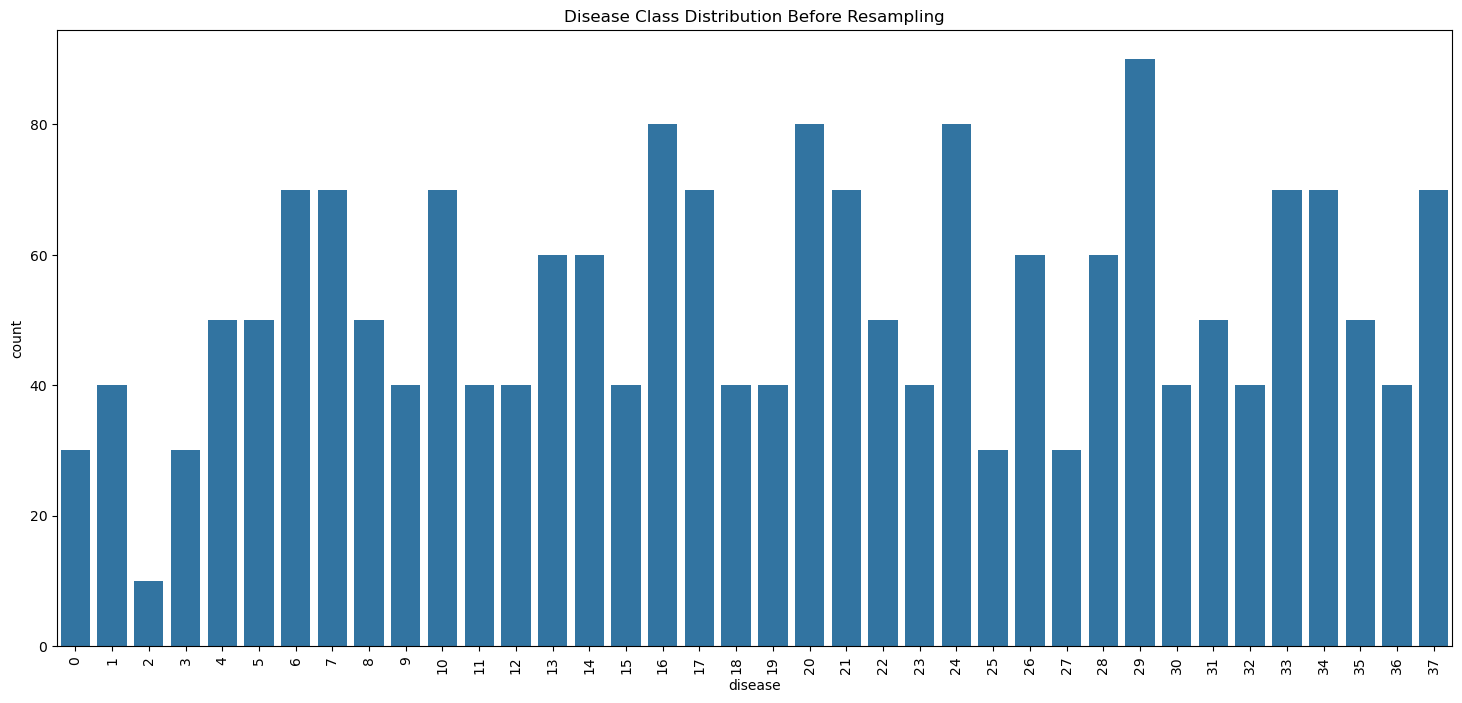

In [180]:
# 3. encode disease labels into numbers and visualize class distribution to check for imbalance

encoder = LabelEncoder()

database['disease'] = encoder.fit_transform(database['disease']) #converts the disease names (strings) into numerical labels

#gives you a matrix where each row is a patient and each column is a symptom
X = database.iloc[:, :-1]
y = database.iloc[:, -1]

#plot
plt.figure(figsize=(18, 8))
sns.countplot(x=y)
plt.title("Disease Class Distribution Before Resampling")
plt.xticks(rotation=90)
plt.show()

In [181]:
# copies the rare disease examples (like Typhoid Fever) multiple times so that it appears just as often as the common ones.

ros = RandomOverSampler(random_state = 42)
X_resampled, y_resampled = ros.fit_resample(X, y)

print(pd.Series(y_resampled).value_counts())

disease
29    90
11    90
4     90
18    90
23    90
1     90
12    90
30    90
32    90
9     90
20    90
36    90
15    90
19    90
27    90
3     90
25    90
0     90
5     90
22    90
35    90
31    90
16    90
24    90
7     90
17    90
34    90
10    90
37    90
6     90
33    90
21    90
26    90
13    90
28    90
14    90
8     90
2     90
Name: count, dtype: int64


In [182]:
# stratified k-fold corss-validation

# convert gender from text (like 'Male', 'Female') to numbers (like 0, 1).
if 'gender' in X_resampled.columns:
    LE = LabelEncoder()
    X_resampled['gender'] = le.fit_transform(X_resampled['gender'])
#fill in missing values (NaNs) with 0.
X_resampled = X_resampled.fillna(0)

if len(y_resampled.shape) > 1:
    y_resampled = y_resampled.values.ravel()
# flattens an array — it turns a multi-dimensional array (like 2D) into a 1D list

In [183]:
models = { 
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}
#choosing 'accuracy' as the metric to evaluate model performance during cross-validation.
cv_scoring = 'accuracy'

strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [184]:
#code performs cross-validation to compare models

for model_name, model in models.items():
    try:
        scores = cross_val_score(
            model,
            X_resampled,
            y_resampled,
            cv = strat_kfold,
            scoring = cv_scoring,
            n_jobs = -1,
            error_score = 'raise'
        )
        print("\n")  # To add a new line
        print(f"Model: {model_name}")
        print(f"Scores: {scores}")
        print(f"Mean Accuracy: {scores.mean():.4f}")

    except Exception as e:
        print(f"Model: {model_name} failed:")
        print(e)



Model: Decision Tree
Scores: [0.5497076  0.54385965 0.5380117  0.53654971 0.52631579]
Mean Accuracy: 0.5389


Model: Random Forest
Scores: [0.54824561 0.53947368 0.54824561 0.53508772 0.53070175]
Mean Accuracy: 0.5404


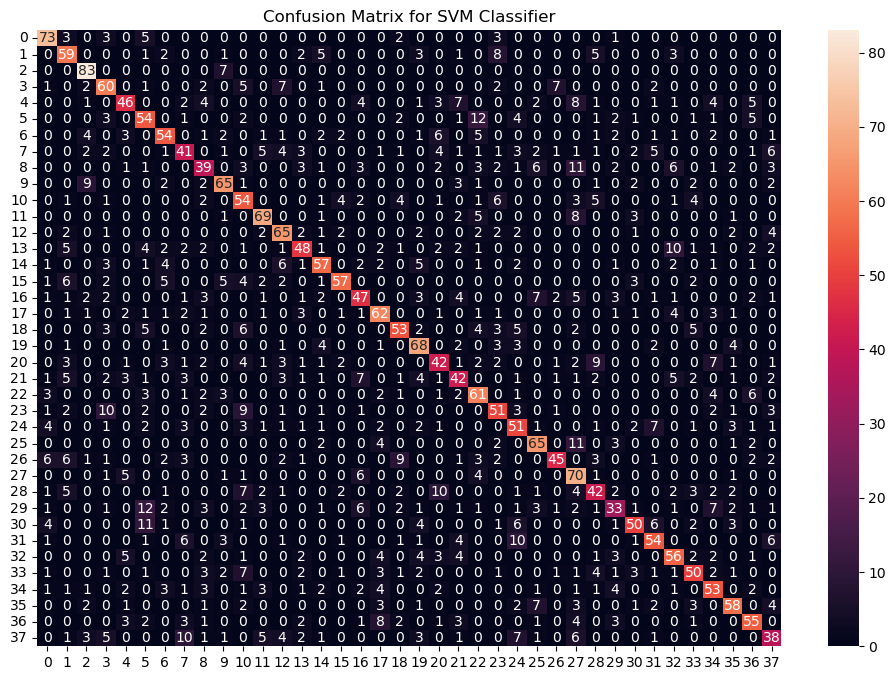

60.53%


In [185]:
#SVC --> to classify

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

svm_model = SVC()
svm_model.fit(X_resampled, y_resampled)
svm_preds = svm_model.predict(X_resampled)

cf_matrix_svm = confusion_matrix(y_resampled, svm_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix_svm, annot=True, fmt='d')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()
#annotate the heatmap with the actual numbers from the confusion matrix
#formats the annotations as decimal integers (i.e., no decimal points)

SCORE = accuracy_score(y_resampled, svm_preds) * 100

print(f"{SCORE:.2f}%")
#computes the fraction of correctly predicted labels. Multiplying by 100 converts it to a percentage.

#weakest was class 29 in classification, most accurate was class 3 

In [186]:
#there is not a normal distrubtion in the data so the accuracy of the Naive Bayes model is lower than the SVM model

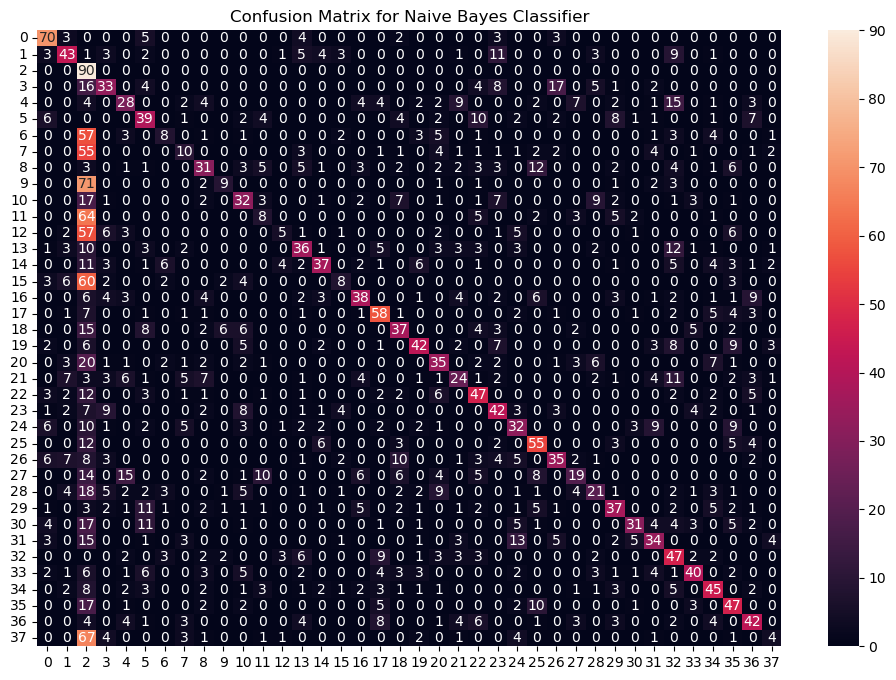

Naive Bayes Accuracy: 37.98%


In [187]:
nb_model = GaussianNB() # Naive Bayes classifier 
nb_model.fit(X_resampled, y_resampled)
nb_preds = nb_model.predict(X_resampled)

cf_matrix_nb = confusion_matrix(y_resampled, nb_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix_nb, annot=True, fmt="d")
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.show()

print(f"Naive Bayes Accuracy: {accuracy_score(y_resampled, nb_preds) * 100:.2f}%")


In [188]:
#class2 once again has a high correlation 
# i am curious as to what label 2 was

og_label = encoder.inverse_transform([2])[0] ## [2] specifies the encoded label to decode; [0] extracts the first (and only) result from the returned array

print(f' label 2: {og_label}')

 label 2: Alcoholic hepatitis


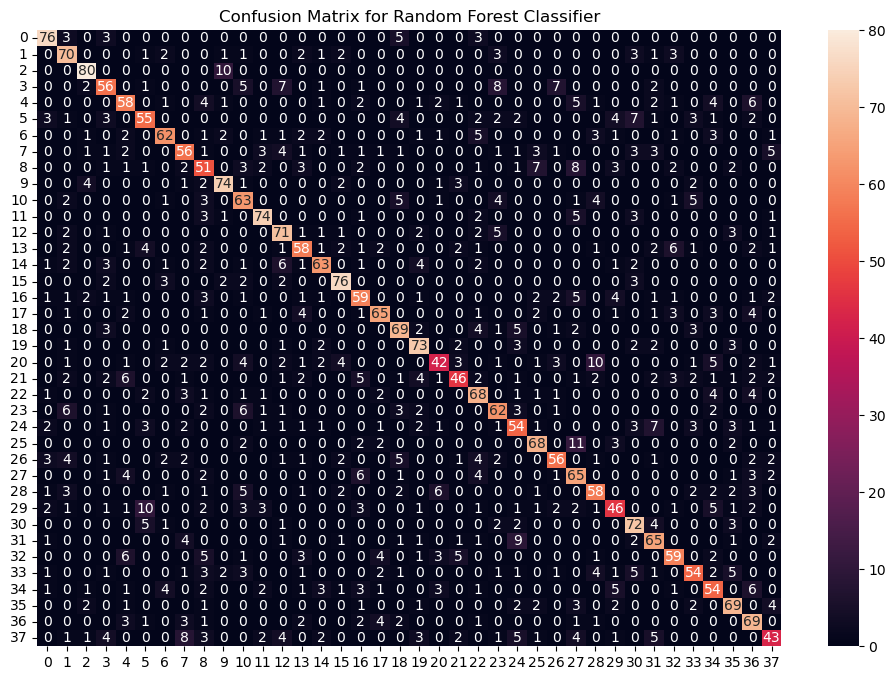

Random Forest Accuracy: 68.98 %


In [189]:
#Random forest classifier

forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_resampled, y_resampled)
forest_pred = forest_model.predict(X_resampled)

cf_matrix_rf = confusion_matrix(y_resampled, forest_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix_rf, annot=True, fmt="d")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

print(f'Random Forest Accuracy: {accuracy_score(y_resampled, forest_pred) * 100:.2f} %')

In [190]:
#RandomForestClassifer is the most accurate classifier so far: why ? 

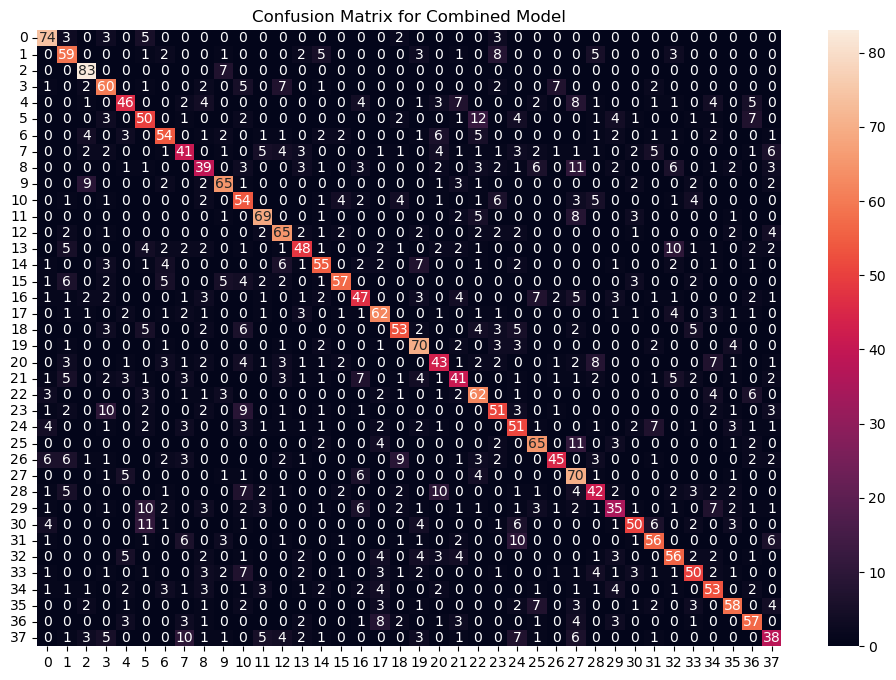

Combined Model Accuracy: 60.64%


In [191]:
#building a robust model --> by triangulating all three model predictions 

from statistics import mode

final_preds = [mode([i, j, k]) for i, j, k in zip(svm_preds, nb_preds, forest_pred)]

cf_matrix_combined = confusion_matrix(y_resampled, final_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix_combined, annot=True, fmt="d")
plt.title("Confusion Matrix for Combined Model")
plt.show()

print(f"Combined Model Accuracy: {accuracy_score(y_resampled, final_preds) * 100:.2f}%")

In [228]:
# I Preprocessed the dataset – loaded, encoded diseases, and resampled to balance classes. Trained multiple ML models – Random Forest, Naive Bayes, SVM. Evaluated their performance – using accuracy scores, confusion matrices, etc.

#The predict_disease() function is the final deployment-style use-case for the models I trained. I will now make predictions on new symptoms. 


symptoms = X.columns.values

symptom_index = {name: label for label, name in enumerate(symptoms)}

def disease(input_symptoms):

    input_symptoms = input_symptoms.split(',')

    input_data = [0] * len(symptom_index)

    for name in input_symptoms:
        if name in symptom_index:
            input_data[symptom_index[name]] = 1

    input_data = np.array(input_data).reshape(1,-1) #In reshape(1, -1), the -1 is Python's shorthand for: "Figure out this dimension automatically based on the size of the data.". The first '1' is for making the array 1 row. 

    forest_pred = encoder.classes_[forest_model.predict(input_data)[0]]
    nb_pred = encoder.classes_[nb_model.predict(input_data)[0]]
    svm_pred = encoder.classes_[svm_model.predict(input_data)[0]]

    final_pred = mode([forest_pred,nb_pred,svm_pred])#It returns the prediction that appears most often among the three. For example, if the predictions are ["cat", "dog", "cat"], the mode is "cat"

    return {"Random forest": forest_pred, "SVM": svm_pred, "Naive Bayes": nb_pred, "Final diagnosis": final_pred}

#___________________________________________________________________________________________

print(disease("Itching,Skin Rash,Nodal Skin Eruptions"))

print(disease("vomiting, nausea"))

{'Random forest': 'Heart attack', 'SVM': 'Impetigo', 'Naive Bayes': 'Urinary tract infection', 'Final diagnosis': 'Heart attack'}
{'Random forest': 'Chronic cholestasis', 'SVM': 'Chronic cholestasis', 'Naive Bayes': 'Jaundice', 'Final diagnosis': 'Chronic cholestasis'}


C:\Users\rr935\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rr935\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\rr935\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\rr935\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rr935\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\rr935\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have vali

RK ADDITION TO FUNC --> results will also show model accuracy

In [218]:
forest_accuracy = accuracy_score(y_resampled, forest_pred)
nb_accuracy = accuracy_score(y_resampled, nb_preds)
svm_accuracy = accuracy_score(y_resampled, svm_preds)

combined_pred = [mode([i,j,k]) for i,j,k in zip(svm_preds, nb_preds, forest_pred)]
combined_accuracy = accuracy_score(y_resampled, combined_pred)

symptoms = X.columns.values

symptom_index = {name: label for label, name in enumerate(symptoms)}

def predict_disease(input_symptoms):

    input_symptoms = input_symptoms.split(',')

    input_data = [0] * len(symptom_index)

    for name in input_symptoms:
        if name in symptom_index:
            input_data[symptom_index[name]] = 1

    input_data = np.array(input_data).reshape(1,-1) #In reshape(1, -1), the -1 is Python's shorthand for: "Figure out this dimension automatically based on the size of the data.". The first '1' is for making the array 1 row. 

    forest_pred = encoder.classes_[forest_model.predict(input_data)[0]]
    nb_pred = encoder.classes_[nb_model.predict(input_data)[0]]
    svm_pred = encoder.classes_[svm_model.predict(input_data)[0]]

    final_pred = mode([forest_pred,nb_pred,svm_pred])#It returns the prediction that appears most often among the three. For example, if the predictions are ["cat", "dog", "cat"], the mode is "cat"

    return (
        f"Random Forest prediction : {forest_pred}, {forest_accuracy*100:.2f}%\n"
        f"Naive Bayes prediction : {nb_pred}, {nb_accuracy*100:.2f}%\n"
        f"SVM prediction : {svm_pred}, {svm_accuracy*100:.2f}%\n"
        f"Final Prediction (Mode) :  {final_pred}, {combined_accuracy*100:.2f}%\n"
)

In [195]:
print(predict_disease("yellow eyes, cough, fever"))

Random Forest prediction : Heart attack, 68.98%
Naive Bayes prediction : Urinary tract infection, 37.98%
SVM prediction : Impetigo, 60.53%
Final Prediction (Mode) :  Heart attack, 60.64%



C:\Users\rr935\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rr935\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\rr935\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [230]:
print(predict_disease("vomiting, nausea"))

Random Forest prediction : Chronic cholestasis, 68.98%
Naive Bayes prediction : Jaundice, 37.98%
SVM prediction : Chronic cholestasis, 60.53%
Final Prediction (Mode) :  Chronic cholestasis, 60.64%



C:\Users\rr935\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rr935\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\rr935\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [234]:
symptoms

array(['fever', 'headache', 'nausea', 'vomiting', 'fatigue', 'joint_pain',
       'skin_rash', 'cough', 'weight_loss', 'yellow_eyes'], dtype=object)

In [237]:
print(predict_disease("cough, weight_loss, yellow_eyes"))

Random Forest prediction : Acne, 68.98%
Naive Bayes prediction : Bronchial Asthma, 37.98%
SVM prediction : Osteoarthritis, 60.53%
Final Prediction (Mode) :  Acne, 60.64%



C:\Users\rr935\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rr935\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\rr935\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
#function is limited by the symptoms list and disease list